<img src="images/logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
###### Authors: Arantxa Palma Rotaeche, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data - Data Exploration
    </h4> 
<img src="images/heartDesease.jpg"  style="max-width:30%">
</center>
<center>

<h5>General workflow</h5>
This notebook covers until data exploration in the following diagram <br>
The remaining steps are found in the notebook <b>02_Modeling.ipynb</b><br>
    <center>
<img src="images/newFlowDiagram.png"  style="max-width:70%">
    </center>

## Contents

1. [Problem description](#pd)
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Identify the data types
    1. Identify and treat "NaN" values
    1. Visualization:
        1. Numeric:
            1. Correlation
            1. Histograms
            1. Scatterplot
            1. Barplot
            1. Boxplot
        1. Categoric:
            1. Frequency
    1. Dimensionality reduction - Feature Selection
    1. Dummies for categorical data
    1. Splitting data
    1. Data normalization
    1. Dimensionality reduction - PCA

### Problem Description <a class="anchor" id="pd"></a>

According to the World Health Organization, cardiovascular diseases (CVDs) are the **number 1** cause of death globally, around **17.9 million** people die each year, **31%** of the deaths worldwide. More than **75%** of the cases occur in low and middle income countries and **85%** are due to heart attacks and strokes. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.<br>

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. Millions of people worldwide struggle to control the risk factors that lead to cardiovascular disease, many others remain unaware that they are at high risk. Many heart attacks and strokes can be prevented by controlling major risk factors through lifestyle interventions and drug treatment where necessary.<br>

The risk factors for CVD include behavioral factors, such as tobacco use, an unhealthy diet, harmful use of alcohol and inadequate physical activity, and physiological factors, including high blood pressure (hypertension), high blood cholesterol and high blood sugar or glucose which are linked to underlying social determinants and drivers, such as ageing, income and urbanization.<br>

*Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. One way is to perform analyses (quantitative) to predict or classify whether the population are prone to CVDs according to significantly health features and act on them in advance*

#### Packages

In [1]:
#Load libraries

library(ggpubr)
suppressMessages(library(tidyverse))
library(Hmisc)
library(corrplot)
library(purrr)
library(tidyr)
#Libraries for plots
library(ggplot2)
library(repr)
library(dplyr)
library(gridExtra)
#Library for dummy variables
library(dummies)
#Libraries for feature selection
library("Boruta")
library("mlbench")
library("caret")
#Library to create the Excel file
library(xlsx)

Loading required package: ggplot2


Loading required package: lattice


Loading required package: survival


Loading required package: Formula



Attaching package: ‘Hmisc’



The following objects are masked from ‘package:dplyr’:

    src, summarize



The following objects are masked from ‘package:base’:

    format.pval, units



corrplot 0.84 loaded



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



dummies-1.5.6 provided by Decision Patterns




Attaching package: ‘caret’



The following object is masked from ‘package:survival’:

    cluster



The following object is masked from ‘package:purrr’:

    lift



### Upload Data <a class="anchor" id="ud"></a>

The dataset can be found at: <br>
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
## Upload dataset
heartOriginal <- read.csv(file = 'heart.csv')
cat('Dimension of the dataset:', dim(heartOriginal)[1],"x",dim(heartOriginal)[2])
head(heartOriginal)

Dimension of the dataset: 303 x 14

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg** - resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy)
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)


**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Summary

In [3]:
summary(heartOriginal)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

### Data Exploration and Preprocessing<a class="anchor" id="de"></a>

#### Identify Data Type

In [4]:
## Data exploration
str(heartOriginal)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


#### Identify and treat "NaN" values

In [5]:
#### Checking if there are values codified as NA
cat("Number of Na in the dataset:",sum(is.na(heartOriginal)))

#### Eliminating missing variables in "Thal".
#The categories labeled with 0 are considered as NaN values here as well because in the description of the dataset they are not considered as a real category but as missing values
heartOriginal$thal[heartOriginal$thal == "0"] <- NA
heartOriginal%>% count(thal)
heart<- na.omit(heartOriginal)
heart%>% count(thal)
cat("New dimension of the dataset: ", dim(heart)[1], "x", dim(heart)[2])

#Data for latter use
heartForLatterUse<-heart

Number of Na in the dataset: 0

thal,n
<int>,<int>
1,18
2,166
3,117
NA,2


thal,n
<int>,<int>
1,18
2,166
3,117


New dimension of the dataset:  301 x 14

#### Re-categorized the categorical features

In [6]:
# To try to avoid the class 0
heart$sex <-heart$sex*2-1
heart$cp <-heart$cp*2-1
heart$fbs <-heart$fbs*2-1
heart$restecg <-heart$restecg*2-1
heart$exang <-heart$exang*2-1
heart$slope <-heart$slope*2-1
heart$thal <-heart$thal*2-1
heart$target <-heart$target*2-1

#### Visualization

##### Numeric

###### Correlation

In [7]:
# Dataframe with only numeric variables
heart_numeric <- heart[ , -which(names(heart) %in% c("sex","cp","fbs","restecg","exang","slope","thal"))]

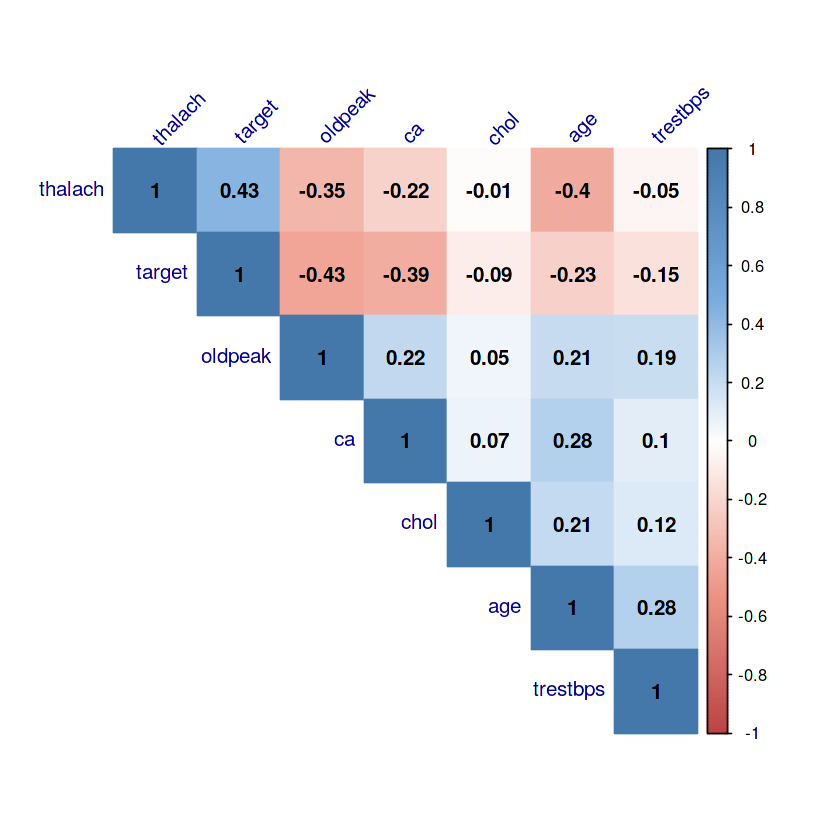

In [8]:
# Correlation matrix and plot
correlation <- cor(heart_numeric)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(correlation, method = "color", col = col(200),
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         )

**Correlation between numeric variables:** among the variables was found a correlation coefficient less than 50% (both positive and negative). _age_ and _thalach_ have the higher value of -0.4 followed by _oldpeak_ and _thalach_ with -0.35. These results show that variables are almost independent. When compared to the target, _oldpeak_ and _thalach_ show the greatest correlation coefficients -0.43 and 0.43, respectively. The latter results are explained with many studies as the _Framingham study_ where  there is a higher risk in clinical outcomes with increased heart rate in the general population and in patients with coronary artery disease or heart failure (Source:https://doi.org/10.1016/j.jjcc.2012.06.013). The lowest value is for _chol_ with -0.09. Therefore, the latter is the less suitable to represent the target

###### Distribution - Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


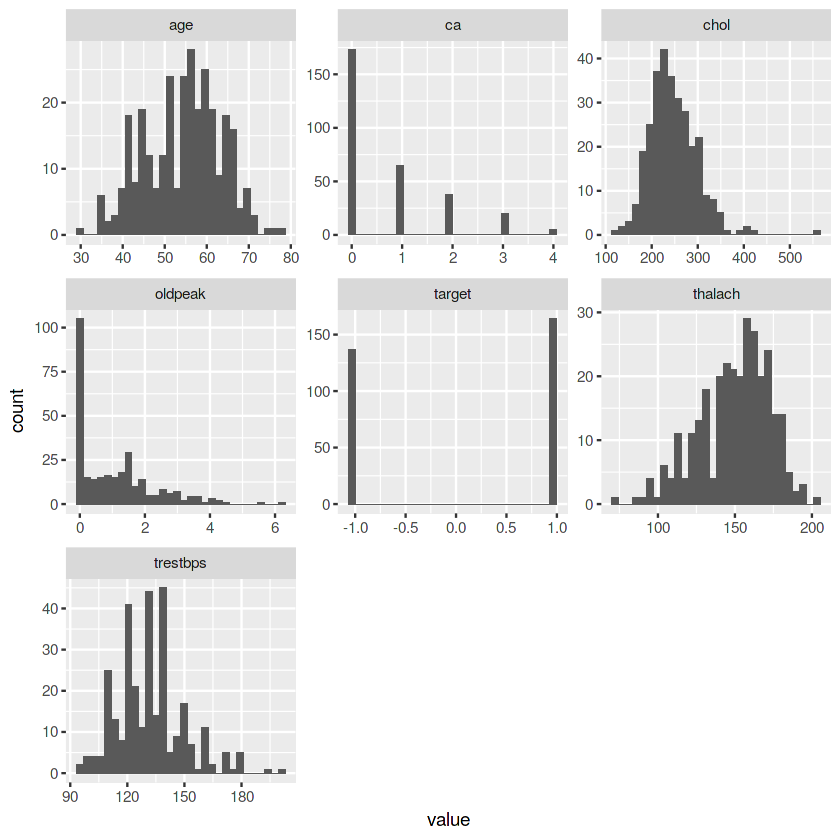

In [9]:
heart_numeric %>%
  gather() %>%
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

From the previous histograms:
- age = The distribution is almost normal
- chol, thalach, trestbps = The distribution of data is skew to one side of the bell-shaped curve
- ca, oldpeak = distributions do not follow a bell-shaped distribution

A further normalization is suggested to reduce the effect of the not well bell-shaped curve and the wide range distribution

###### Scatterplot

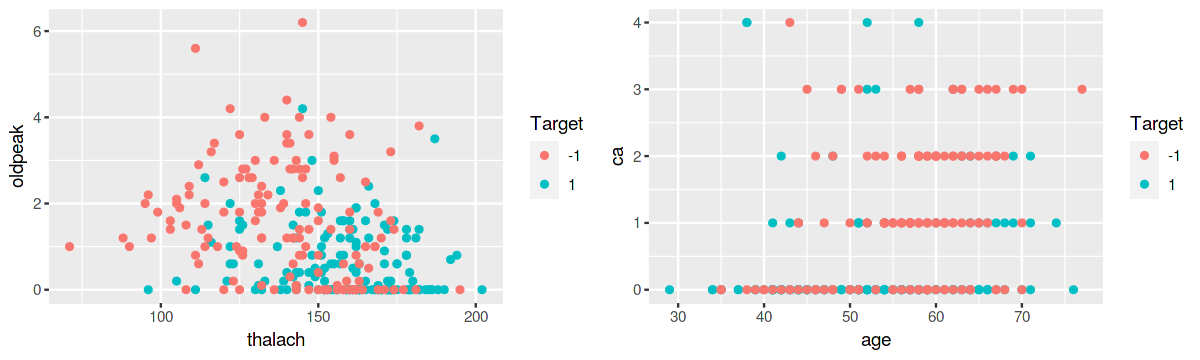

In [10]:
# Scatter plot comparing thalach-oldpeak and age-ca, with color representing target
options(repr.plot.width=10, repr.plot.height=3)
Target <-factor(heart_numeric$target)
p1 <- ggplot(heart_numeric)+
geom_point(aes(x=thalach, y=oldpeak, color=Target))
p2 <- ggplot(heart_numeric)+
geom_point(aes(x=age, y=ca, color=Target))

grid.arrange(p1, p2, nrow = 1)#subplot
options(repr_option_defaults)

**Scatter plots numeric variables vs target:** The variables with the highest (First 4th) correlation coefficients compared to the target where plotted. The were not significant distinction between target's classes (-1 healthy and 1 unhealthy), the entries were widely distributed without any clear pattern

###### Barplot

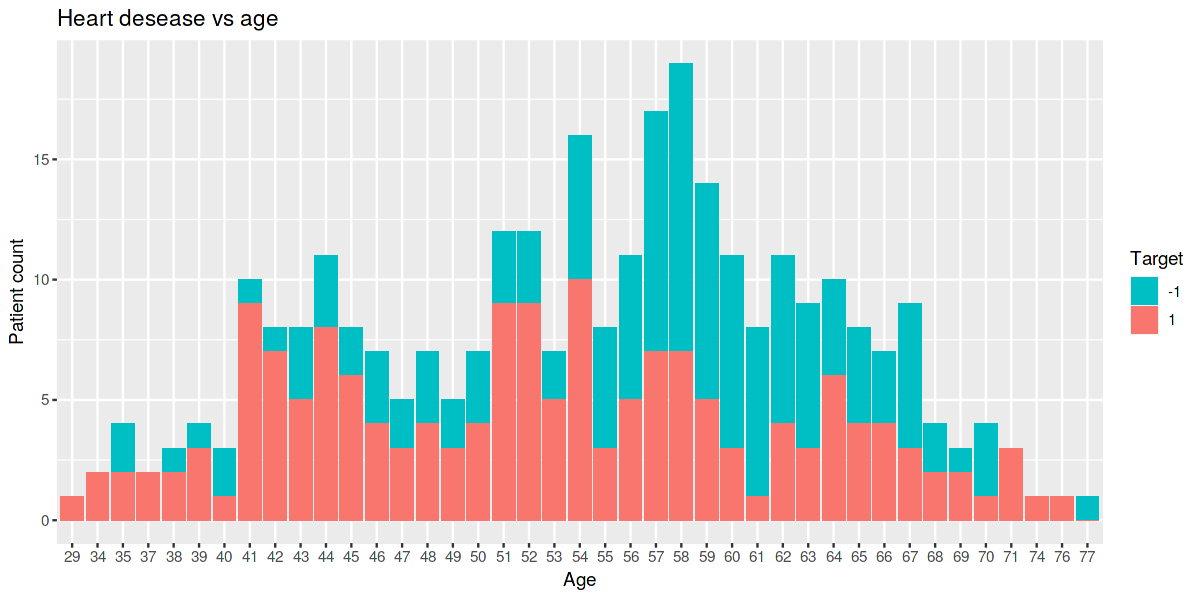

In [11]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(as.data.frame(table(heart_numeric$age,heart_numeric$target)), aes(x = Var1, y = Freq, fill = Var2)) +
    geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
   labs(y = "Patient count",
         x = "Age",
         fill = "Target",
         title = "Heart desease vs age")


In [12]:
age_bins <- c(20,30,40,50,60,70,80) #bins for age
age_cut <- cut(heart_numeric$age, age_bins) #Divide the interval with the bins

trestbps_bins <- c(80,100,120,140,160,180) #bins for trestbps
trestbps_cut <- cut(heart_numeric$trestbps, trestbps_bins) #Divide the interval with the bins

chol_bins <- c(100,150,200,250,300,350,400,450) #bins for trestbps
chol_cut <- cut(heart_numeric$chol, chol_bins) #Divide the interval with the bins

thalach_bins <- c(60,85,110,135,150,175,200,225) #bins for thalach
thalach_cut <- cut(heart_numeric$thalach, thalach_bins) #Divide the interval with the bins

oldpeak_bins <- c(0,1,2,3,4,5,6,7) #bins for oldpeak
oldpeak_cut <- cut(heart_numeric$oldpeak, oldpeak_bins) #Divide the interval with the bins

ca_bins <- c(0,1,2,3,4) #bins for ca
ca_cut <- cut(heart_numeric$ca, ca_bins) #Divide the interval with the bins

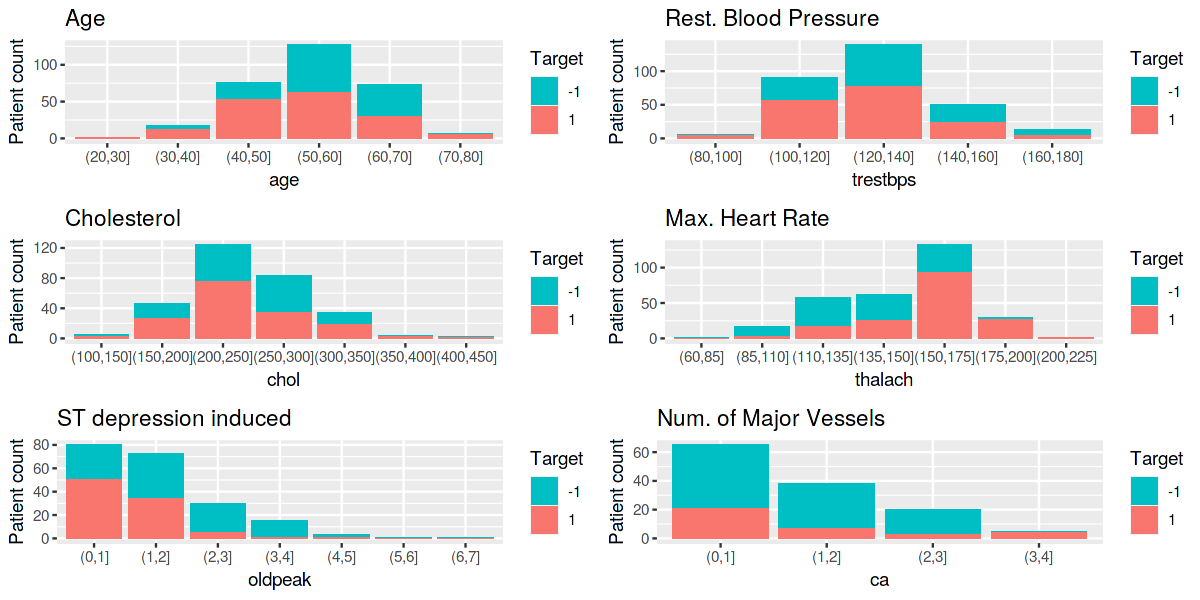

In [13]:
options(repr.plot.width=10, repr.plot.height=5)
p_age <- ggplot(as.data.frame(table(age_cut,heart_numeric$target)), aes(x = age_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "age",
                     fill = "Target",
                     title = "Age")
p_trestbps <- ggplot(as.data.frame(table(trestbps_cut,heart_numeric$target)), aes(x = trestbps_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "trestbps",
                     fill = "Target",
                     title = "Rest. Blood Pressure")
p_chol <- ggplot(as.data.frame(table(chol_cut,heart_numeric$target)), aes(x = chol_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "chol",
                     fill = "Target",
                     title = "Cholesterol")
p_thalach <- ggplot(as.data.frame(table(thalach_cut,heart_numeric$target)), aes(x = thalach_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "thalach",
                     fill = "Target",
                     title = "Max. Heart Rate")
p_oldpeak <- ggplot(as.data.frame(table(oldpeak_cut,heart_numeric$target)), aes(x = oldpeak_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "oldpeak",
                     fill = "Target",
                     title = "ST depression induced")
p_ca <- ggplot(as.data.frame(table(ca_cut,heart_numeric$target)), aes(x = ca_cut, y = Freq, fill = Var2)) +
            geom_bar(stat="identity")+scale_fill_manual(values=c("#00BFC4", "#F8766D"))+
               labs(y = "Patient count",
                     x = "ca",
                     fill = "Target",
                     title = "Num. of Major Vessels")

#subplots
grid.arrange(p_age, p_trestbps, p_chol, p_thalach, p_oldpeak, p_ca, nrow = 3)
options(repr_option_defaults)

**Bar plots numeric variables vs target:** The distribution among each variable for the target in sets of bins was performed. The ranges were the unhealthy (1) observations were the most prevalent among the variables is presented as follows: age (20,40] and (70,80]; resting blood pressure (80,120]; cholesterol  (100,250] and (300, 450], maximum heart rate (150, 225], ST depression induced (0-2], number of major vessels (3,4]

###### Boxplot

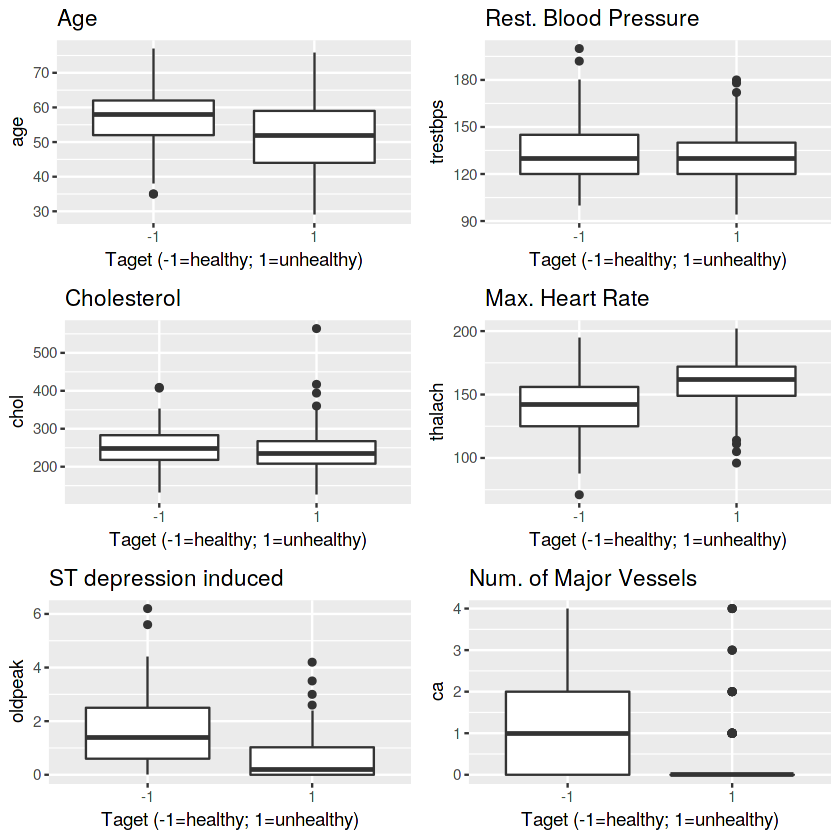

In [14]:
targetAge <- ggplot(data = heart, mapping = aes(x =  Target, y = age)) +
     geom_boxplot()+
     labs(title="Age",
         x="Taget (-1=healthy; 1=unhealthy)")

targetTrestbps <- ggplot(data = heart, mapping = aes(x =  Target, y = trestbps)) +
     geom_boxplot()+
     labs(title="Rest. Blood Pressure",
         x="Taget (-1=healthy; 1=unhealthy)")

targetChol <- ggplot(data = heart, mapping = aes(x =  Target, y = chol)) +
     geom_boxplot()+
     labs(title="Cholesterol",
         x="Taget (-1=healthy; 1=unhealthy)")

targetThalach <- ggplot(data = heart, mapping = aes(x =  Target, y = thalach)) +
     geom_boxplot()+
     labs(title="Max. Heart Rate",
         x="Taget (-1=healthy; 1=unhealthy)")

targetOldpeak<- ggplot(data = heart, mapping = aes(x =  Target, y = oldpeak)) +
     geom_boxplot()+
     labs(title="ST depression induced",
         x="Taget (-1=healthy; 1=unhealthy)")

targetCa <- ggplot(data = heart, mapping = aes(x =  Target, y = ca)) +
     geom_boxplot()+
     labs(title="Num. of Major Vessels",
         x="Taget (-1=healthy; 1=unhealthy)")

grid.arrange(targetAge, targetTrestbps,
             targetChol, targetThalach,
             targetOldpeak, targetCa, ncol = 2)

**Boxplot numeric variables vs target:** An analysis of the median, max, min, outliers and quartiles for each variable compared to the target was presented. No significant differences were found between the classes (0 and 1) because the boxes were almost overlapping each other. Only for _thalach_(maximum heart rate) was found a slightly differences for 0, the median ~140 and for 1 ~165

##### Categoric

###### Frequency

`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


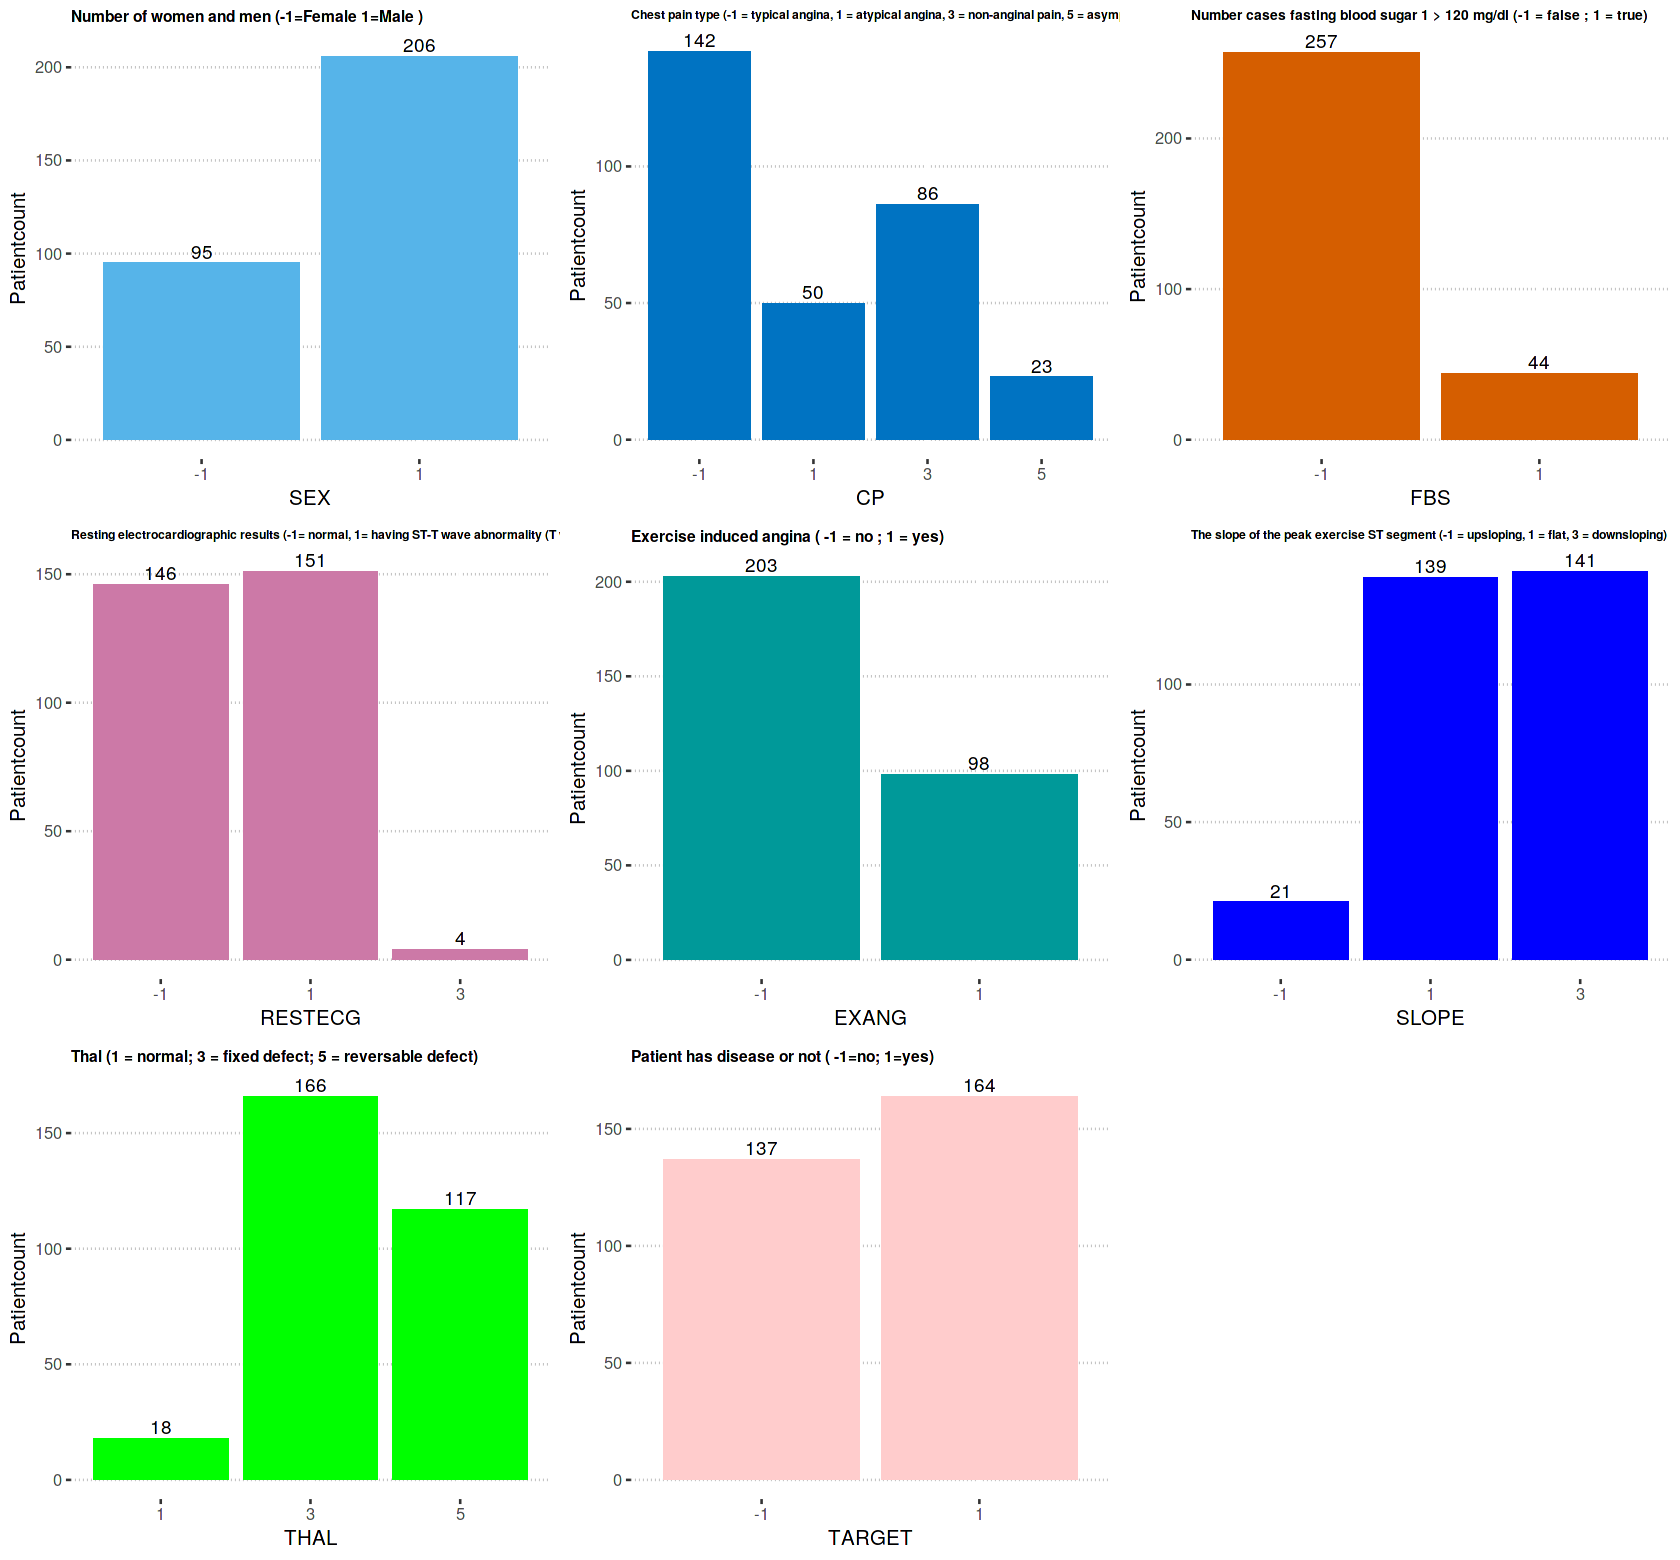

In [15]:

options(repr.plot.width=14, repr.plot.height=13)
CP2 <- heart %>%
  group_by(cp) %>%
  summarise(Patientcount = n())

CP <- factor(CP2$cp)
CP2plot <- ggplot(CP2, aes(x = CP, y = Patientcount)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Chest pain type (-1 = typical angina, 1 = atypical angina, 3 = non-anginal pain, 5 = asymptomatic)")+ theme(plot.title = element_text(size = 7, face = "bold"))

FBS2 <- heart %>%
  group_by(fbs) %>%
  summarise(Patientcount = n())
FBS <- factor(FBS2$fbs)
FBS2plot <- ggplot(FBS2, aes(x = FBS, y = Patientcount)) +
  geom_bar(fill = "#D55E00", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Number cases fasting blood sugar 1 > 120 mg/dl (-1 = false ; 1 = true)")+ theme(plot.title = element_text(size = 8, face = "bold"))

RestECG2 <- heart %>%
  group_by(restecg) %>%
  summarise(Patientcount = n())
RESTECG <- factor(RestECG2$restecg)
RestECG2plot <- ggplot(RestECG2, aes(x = RESTECG, y = Patientcount)) +
  geom_bar(fill = "#CC79A7", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Resting electrocardiographic results (-1= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 3= showing probable or definite left ventricular hypertrophy)")+ theme(plot.title = element_text(size = 7, face = "bold"))


Exang2 <- heart %>%
  group_by(exang) %>%
  summarise(Patientcount = n())
EXANG <- factor(Exang2$exang)
Exang2plot <- ggplot(Exang2, aes(x = EXANG, y = Patientcount)) +
  geom_bar(fill = "#009999", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Exercise induced angina ( -1 = no ; 1 = yes)")+ theme(plot.title = element_text(size = 9, face = "bold"))


Slope2 <- heart %>%
  group_by(slope) %>%
  summarise(Patientcount = n())
SLOPE <- factor(Slope2$slope)
Slope2plot <- ggplot(Slope2, aes(x = SLOPE, y = Patientcount)) +
  geom_bar(fill = "#0000FF", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="The slope of the peak exercise ST segment (-1 = upsloping, 1 = flat, 3 = downsloping)")+ theme(plot.title = element_text(size = 7, face = "bold"))


Thal2 <- heart %>%
  group_by(thal) %>%
  summarise(Patientcount = n())
THAL <- factor(Thal2$thal)
Thal2plot <- ggplot(Thal2, aes(x = THAL, y = Patientcount)) +
  geom_bar(fill = "green", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Thal (1 = normal; 3 = fixed defect; 5 = reversable defect)")+ theme(plot.title = element_text(size = 9, face = "bold"))

Target2 <- heart %>%
  group_by(target) %>%
  summarise(Patientcount = n())
TARGET <- factor(Target2$target)
Target2plot <- ggplot(Target2, aes(x = TARGET, y = Patientcount)) +
  geom_bar(fill = "#FFCCCC", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Patient has disease or not ( -1=no; 1=yes)")+ theme(plot.title = element_text(size = 9, face = "bold"))


Sex2 <- heart %>%
  group_by(sex) %>%
  summarise(Patientcount = n())
SEX <- factor(Sex2$sex)
Sex2plot <- ggplot(Sex2, aes(x = SEX, y = Patientcount)) +
  geom_bar(fill = "#56B4E9", stat = "identity") +
  geom_text(aes(label = Patientcount), vjust = -0.3) + 
  theme_pubclean()+ ggtitle(label="Number of women and men (-1=Female 1=Male )")+ theme(plot.title = element_text(size = 9, face = "bold"))


grid.arrange(Sex2plot, CP2plot,FBS2plot,RestECG2plot , Exang2plot, Slope2plot , Thal2plot,Target2plot,  nrow = 3)


options(repr_option_defaults)


**Conclusion Frequencies of Categorical Variables**<br>
- Sex:Number of male patients in the dataframe is almost the dobule than women, therefore there could be a bias since the proportion of both sexs is different.
- Chest pain type: Most of the patients had typical angina in the dataframe used.
- Fbs: Most of the patients of this dataframe didn't have their fasting blood sugar above 120 mg/dl, it can be seen a big difference in the distribution, therefore that has to be taken into account if the prediction model does not have good classification results.
- RestECG: The distribution between the patients with "normal ST-T wave" and "ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)" looks similar, nevertheless, the distribution of the patients showing probable or definite left ventricular hypertrophy is just a few (only four observations), therefore that has to be taken into account if the prediction model does not have good classification results.
- Exang: Most of the observations in the dataframe did not have Exercise induced angina, therefore that has to be taken into account if the prediction model does not have good classification results.
- Slope: Most of the observations where between having "Flat" and "Downsloping" of the peak exercise ST segment, just 21 had "Upsloping" (this last has to be taken into account in the prediction models).
- Thal: Most of the patients had a fixed defect Thalassemia blood disorder (Non-reversible)
- Target: It can be seen in this bar plot that the distribution between having a heart disease or not is pretty similar.

###### Distribution

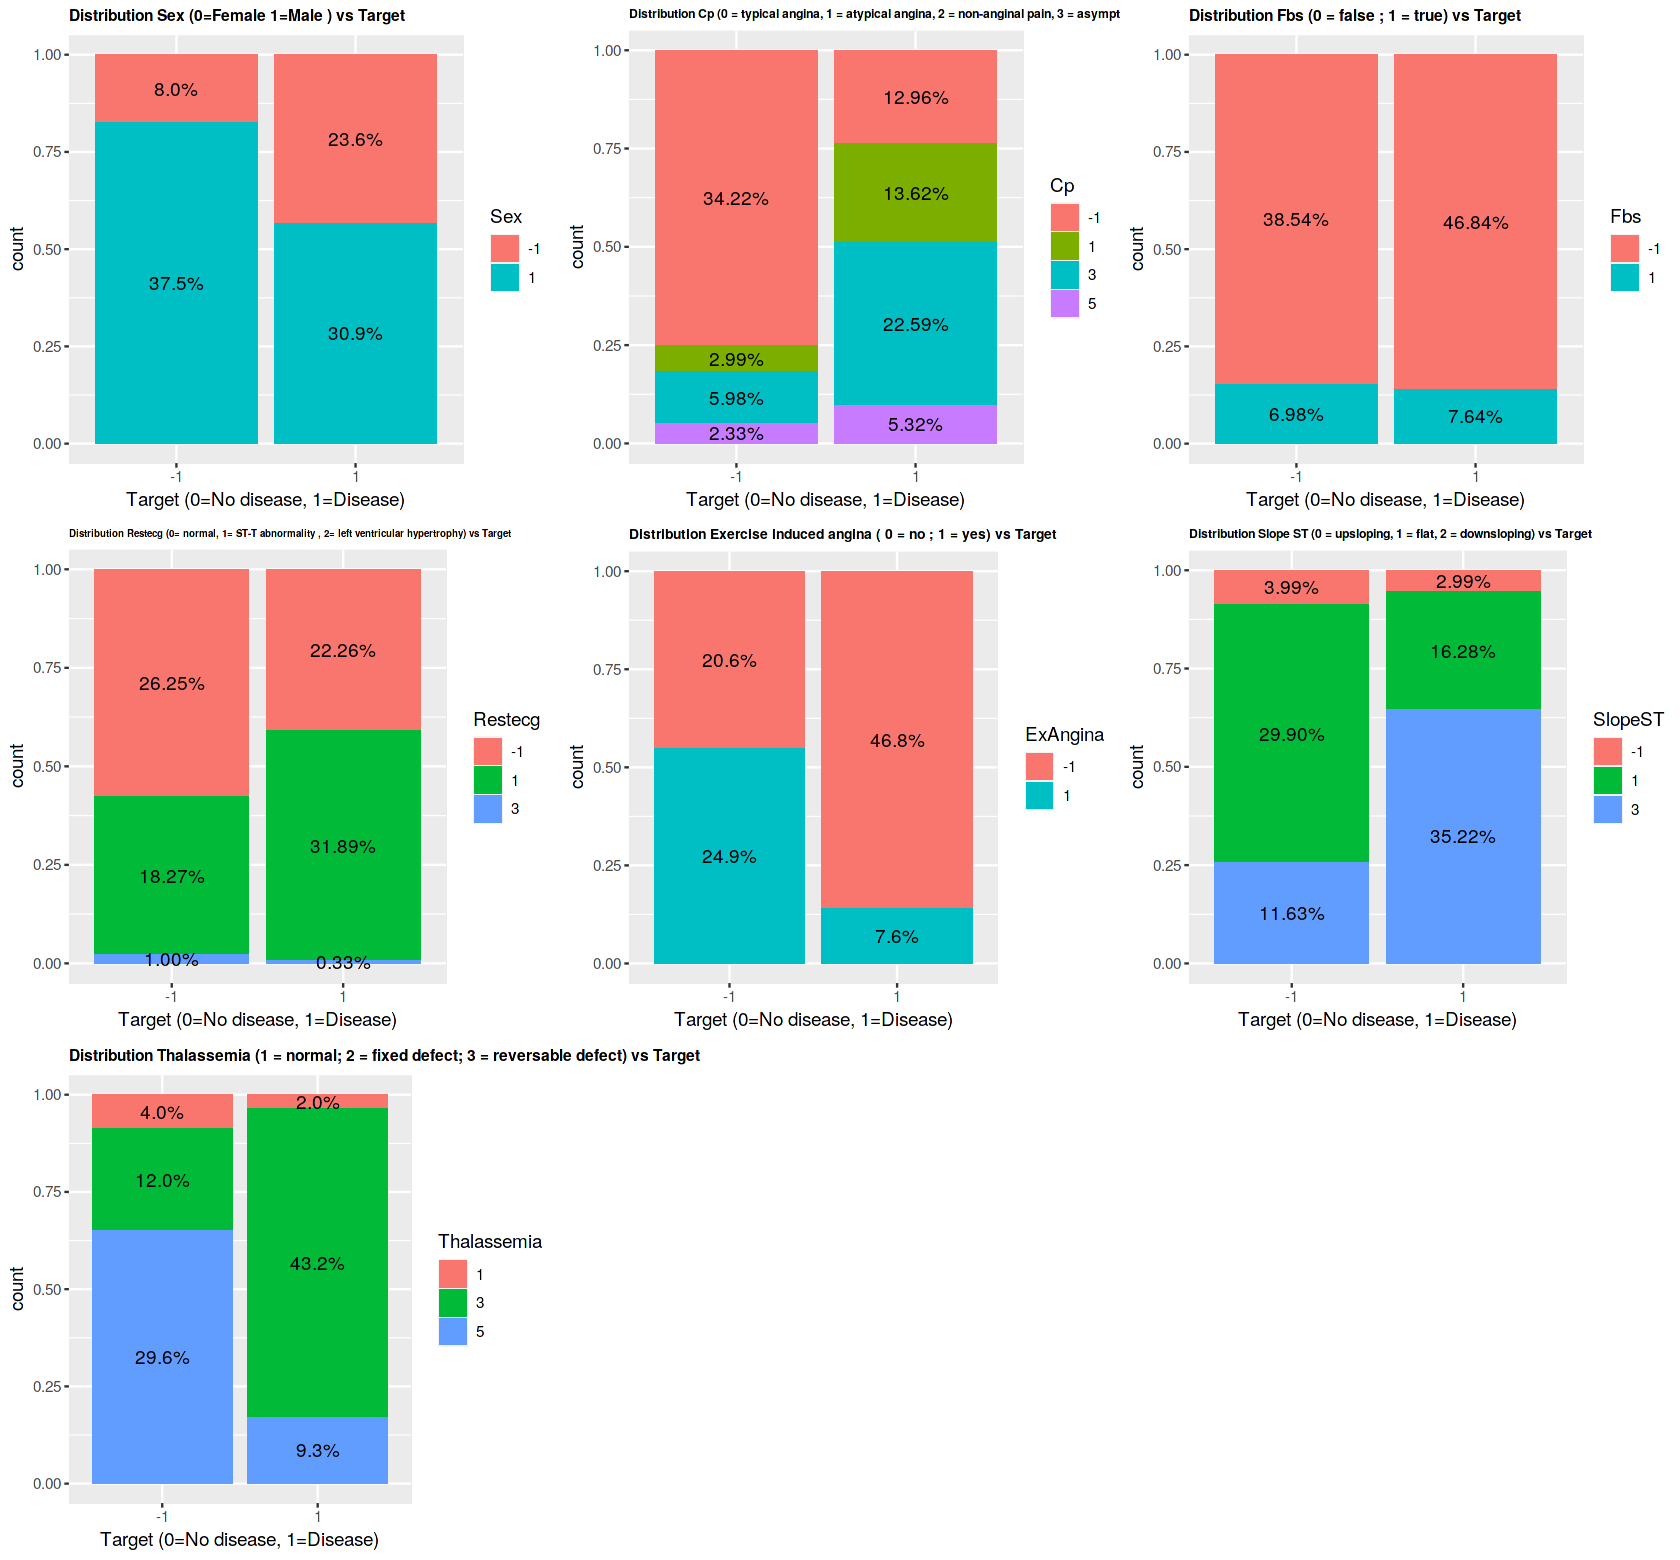

In [16]:
options(repr.plot.width=14, repr.plot.height=13)

Target <- factor(heart$target)
Sex <- factor(heart$sex)

DistributionTargetbyGender <- ggplot(data=heart)+geom_bar(aes(x=factor(target),fill=Sex))+ xlab("Target (0=No disease, 1=Disease)") + 
  ylab("Count")+ggtitle(label="Distribution No disease and disease by Gender")+  theme_bw()

DistTargetSex <- ggplot(heart,aes(x=Target,fill=Sex))+
    geom_bar(position="fill")+ xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Sex (0=Female 1=Male ) vs Target ")+ theme(plot.title = element_text(size = 9, face = "bold"))

Cp <- factor(heart$cp)

DistTargetCp <- ggplot(heart,aes(x=Target,fill=Cp))+
    geom_bar(position="fill")+ xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Cp (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) vs Target")+ theme(plot.title = element_text(size = 7, face = "bold"))

Fbs <- factor(heart$fbs)

DistTargetFbs <- ggplot(heart,aes(x=Target,fill=Fbs))+
    geom_bar(position="fill") + xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Fbs (0 = false ; 1 = true) vs Target")+ theme(plot.title = element_text(size = 9, face = "bold"))


Restecg <- factor(heart$restecg)

DistTargetRestecg <- ggplot(heart,aes(x=Target,fill=Restecg))+
    geom_bar(position="fill") + xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Restecg (0= normal, 1= ST-T abnormality , 2= left ventricular hypertrophy) vs Target")+ theme(plot.title = element_text(size = 5.5, face = "bold"))

ExAngina <- factor(heart$exang)

DistTargetExang <- ggplot(heart,aes(x=Target,fill=ExAngina))+
    geom_bar(position="fill") + xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Exercise induced angina ( 0 = no ; 1 = yes) vs Target")+ theme(plot.title = element_text(size = 8, face = "bold"))

SlopeST <- factor(heart$slope)

DistTargetSlope <- ggplot(heart,aes(x=Target,fill=SlopeST))+
    geom_bar(position="fill") + xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Slope ST (0 = upsloping, 1 = flat, 2 = downsloping) vs Target")+ theme(plot.title = element_text(size = 7, face = "bold"))

Thalassemia <- factor(heart$thal)

DistTargetThal <- ggplot(heart,aes(x=Target,fill=Thalassemia))+
    geom_bar(position="fill") + xlab("Target (0=No disease, 1=Disease)") +
    geom_text(aes(label=scales::percent(..count../sum(..count..))),
              stat='count',position=position_fill(vjust=0.5))+ ggtitle(label="Distribution Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect) vs Target")+ theme(plot.title = element_text(size = 9, face = "bold"))

grid.arrange(DistTargetSex, DistTargetCp,DistTargetFbs,DistTargetRestecg, DistTargetExang, DistTargetSlope, DistTargetThal , nrow = 3)


options(repr_option_defaults)

**Conclusion Percentages Distribution of Categorical Variables**<br>
- Sex vs Target: Although the proportion in Men is almost the double than in women, it can be seen that women where the ones showin most heart disease (It could be said that being a woman is correlated to having a heart disease), therefore there is not a disbalance.
- Chest pain type vs Target: Most of the patients who did not have a heart disease showed typical angina, and the ones who had heart disease showed more non-anginal-pain (It could be said that people having typical angina will have also a heart disease).
- Fast blood sugar > 120 mg/dl vs Target: In this case, it can be seen a similar proportion between the patients who had heart disease and not heart disease who showed a fast blood sugar above 120 mg/dl (it could be said that this variable will not help in defining if a person has or not a disease).
- RestEcg vs Target: In this case it can be seen a similar proportion between the patients who had normal resting ECG results in the patients who had a disease and the ones who did not have; it happens the same with the ones who showed probable or definite left ventricular hypertrophy. There is just a slightly difference in proportion with the ones who showed having ST-T wave abnormality. Nevertheless, the proportion is not that different between does who had the disease or not, so, this variable could not be relevant.
- Exercise induced angina vs Target: In thid variable it is seen that most of the patients who had the disease did not have exercise induced angina. On the other hand most of the patients who did not have the heart disease had exercise induced angina. Therefore, this variable could be correlated with the probability of having a heart disease.
- Slope ST segment vs Target: In this variable it can be seen that most of the patients who had a heart disease also had a downsloping in their ST segment. On the other hand most of the patients who did not have a heart disease had a flat ST segment; upsloping was almost in the same proportion in both cases. Therefore having a flat or a downsloping in the ST segment could be correlated to having a heart disease.
- Thalassemia vs Target: In this variable most of the patients who had a heart disease also had a Thalassemia fixed defect disorder; while the patient who did not have a heart disease also had a reversable defect Thalassemia. Having a "normal" Thalassemia was almost in the same proportion in both cases.


###### Association between Categorical Variables

As a measure of association between two nominal categorical variables, the lambda coefficient or Goodman–Kruskal's lambda has become a most popular measure.
Categorical variables arise frequently in practice, either because certain variables are inherently categorical (e.g., state, country, political affiliation, merchandise type, color, medical condition, etc.) or because numerical variables are frequently grouped in some application areas, converting them to categorical variables (e.g., replacing age with age group in demographic analysis). There is loss of information in making this conversion, but the original numerical data values are often not available, leaving us with categorical data for analysis and modeling. 
 In any of these cases, quantitative association measures may be of interest, and the most popular measures available for categorical variables are the chi-square and Cramer’s V but there also exist the  GoodmanKruskal package which calculates the " Goodman and Kruskal’s tau measure" 
 
Goodman and Kruskal’s measure is asymmetric: the association between variables "x" and "y" is generally not the same as that between "y" and "x". 
  
- k= Number of levels, for instance: 0=yes, 1= no; k=2

https://www.tandfonline.com/doi/abs/10.1080/02664763.2017.1346066
https://cran.r-project.org/web/packages/GoodmanKruskal/vignettes/GoodmanKruskal.html

`library("GoodmanKruskal")` <br>
`varSet1 <- c("sex", "cp", "exang","fbs","restecg","slope","thal","target")`<br>
`CarFrame1 <- subset(heart, select = varSet1)`<br>
`GKmatrix1 <- GKtauDataframe(CarFrame1)`<br>
`plot(GKmatrix1)`<br>
`heart$thal`


<center>
<h4>
    Association between Categorical Variables
    </h4> 
<img src="images/association.PNG"  style="max-width:30%">
</center>
<center>

**Conclusion Association between Categorical Variables**<br>
- A reasonably strong association seen in this plot is that between thal and target, where the forward association is 0.28 and the reverse association is 0.23; these numbers suggest that having Thalassemia ("thal") which has levels  (3 = normal; 6 = fixed defect; 7 = reversable defect) is highly predictive of target (which has level "yes" and "no" of having a heart disease). Which seems reasonable since many people with thalassemia develop cardiac issues (heart- related issues) that can have a significant impact on their health. Nevertheless, the forward association was just about 28% and the reverse association 23% which is not a great percentage.

Reference:
http://cooleysanemia.org/updates/Cardiac.pdf

- In all the other variables it does not seem a high percentage of association between them.

##### General conclusions for data exploration

**Numeric**<br>
- Correlation between numeric variables: among the variables was found a correlation coefficient less than 50% (both positive and negative) then they could be considered as independent variables. When compared to the target, _oldpeak_ and _thalach_ show the greatest correlation coefficients -0.43 and 0.43, respectively and both might be the most representative when to define the target. Nonetheless, the relation is less than the 50%

- Histograms of numeric variables: Due to the shape of the curves a normalization will be performed for all the variables in next steps.

- Scatter and box plots did not show any clear pattern distribution between the unhealthy (-1) and healthy (1) categories for the target

**Categorical**<br>
- By doing the frequence analysis and distribution analysis in categorical variables it could be said that "fbs" and "restecg" could not be important variables to predict a heart disease in patitents, while "cp", "sex", "exang", "slope" and "thal" could be important variables to define the probability of having a heart disease.
- "thal" which means "Having a Thalassemia disorder" was the variable that had more association with "target" (having a heart disease or not).

**All features**<br>
The general behavior of numeric and categorical variables vs target do not required extra processing (logaritmic/exponential/Z transformation, not imputation) or other modifications. Moreover, the individual variables are not relevant _per se_ to directly represent the target. Therefore, models combining the variables are required

#### Dimensionality reduction Feature selection

Feature selection is a crucial step in predictive modeling. This technique achieves supreme importance when a data set comprised of several variables is given for model building. Methods like Principal Component Analysis, Singular Value decomposition etc, usually are unsupervised ways of feature selection. For example, PCA, which uses variance in data to find the components, don't take into account the information between feature values and the target class or values. Also, there are certain assumptions, such as normality, associated with such methods which require some kind of transformations before starting to apply them. These constraints doesn't apply to all kinds of data.

**Boruta** is a feature selection algorithm. Precisely, it works as a wrapper algorithm around Random Forest. This package derive its name from a demon in Slavic mythology who dwelled in pine forests.
Feature selection plays an important role when improving models by feeding in only those features that are uncorrelated and non-redundant is required. Not only it helps in training models faster but also reduces the complexity of the model, makes it easier to interpret and improves the accuracy, precision or recall, other performance metrics.
In wrapper methods, a subset of features is selected and using them train a model. Based on the inferences that draw from the previous model, a decition to add or remove features from the subset must be made. Forward Selection, Backward elimination are some of the examples for wrapper methods.
The wrapper method available in R is in the package called `Boruta` <br>
Source: https://www.datacamp.com/community/tutorials/feature-selection-R-boruta

In [17]:
set.seed(111)
boruta<- Boruta(target~.,data=heart,doTrace=2,maxRuns=500)
print(boruta)

 1. run of importance source...


 2. run of importance source...


 3. run of importance source...


 4. run of importance source...


 5. run of importance source...


 6. run of importance source...


 7. run of importance source...


 8. run of importance source...


 9. run of importance source...


 10. run of importance source...


 11. run of importance source...


After 11 iterations, +3.9 secs: 


 confirmed 9 attributes: age, ca, cp, exang, oldpeak and 4 more;


 rejected 1 attribute: chol;


 still have 3 attributes left.



 12. run of importance source...


 13. run of importance source...


 14. run of importance source...


 15. run of importance source...


After 15 iterations, +5.4 secs: 


 rejected 1 attribute: fbs;


 still have 2 attributes left.



 16. run of importance source...


 17. run of importance source...


 18. run of importance source...


 19. run of importance source...


 20. run of importance source...


 21. run of importance source...


 22. run of importance source...


 23. run of importance source...


 24. run of importance source...


 25. run of importance source...


 26. run of importance source...


 27. run of importance source...


 28. run of importance source...


 29. run of importance source...


 30. run of importance source...


 31. run of importance source...


 32. run of importance source...


 33. run of importance source...


 34. run of importance source...


 35. run of importance source...


 36. run of importance source...


 37. run of importance source...


 38. run of importance source...


 39. run of importance source...


 40. run of importance source...


 41. run of importance source...


 42. run of importance source...


 43. run of importance source...


 44. run of importance source...


After 44 iterations, +14 secs: 


 rejected 1 attribute: restecg;


 still have 1 attribute left.



 45. run of importance source...


 46. run of importance source...


 47. run of importance source...


 48. run of importance source...


 49. run of importance source...


 50. run of importance source...


 51. run of importance source...


 52. run of importance source...


 53. run of importance source...


 54. run of importance source...


 55. run of importance source...


 56. run of importance source...


 57. run of importance source...


 58. run of importance source...


 59. run of importance source...


 60. run of importance source...


 61. run of importance source...


 62. run of importance source...


 63. run of importance source...


 64. run of importance source...


 65. run of importance source...


 66. run of importance source...


 67. run of importance source...


 68. run of importance source...


 69. run of importance source...


 70. run of importance source...


 71. run of importance source...


 72. run of importance source...


 73. run of importance source...


 74. run of importance source...


 75. run of importance source...


 76. run of importance source...


 77. run of importance source...


 78. run of importance source...


 79. run of importance source...


 80. run of importance source...


 81. run of importance source...


 82. run of importance source...


 83. run of importance source...


 84. run of importance source...


 85. run of importance source...


 86. run of importance source...


 87. run of importance source...


 88. run of importance source...


 89. run of importance source...


 90. run of importance source...


 91. run of importance source...


 92. run of importance source...


 93. run of importance source...


 94. run of importance source...


 95. run of importance source...


 96. run of importance source...


 97. run of importance source...


 98. run of importance source...


 99. run of importance source...


 100. run of importance source...


 101. run of importance source...


 102. run of importance source...


 103. run of importance source...


 104. run of importance source...


 105. run of importance source...


 106. run of importance source...


 107. run of importance source...


 108. run of importance source...


 109. run of importance source...


 110. run of importance source...


 111. run of importance source...


 112. run of importance source...


 113. run of importance source...


 114. run of importance source...


 115. run of importance source...


 116. run of importance source...


 117. run of importance source...


 118. run of importance source...


 119. run of importance source...


 120. run of importance source...


 121. run of importance source...


 122. run of importance source...


 123. run of importance source...


 124. run of importance source...


 125. run of importance source...


 126. run of importance source...


 127. run of importance source...


 128. run of importance source...


 129. run of importance source...


 130. run of importance source...


 131. run of importance source...


 132. run of importance source...


 133. run of importance source...


 134. run of importance source...


 135. run of importance source...


 136. run of importance source...


 137. run of importance source...


 138. run of importance source...


 139. run of importance source...


 140. run of importance source...


 141. run of importance source...


 142. run of importance source...


 143. run of importance source...


 144. run of importance source...


 145. run of importance source...


 146. run of importance source...


 147. run of importance source...


 148. run of importance source...


 149. run of importance source...


 150. run of importance source...


 151. run of importance source...


 152. run of importance source...


 153. run of importance source...


 154. run of importance source...


 155. run of importance source...


 156. run of importance source...


 157. run of importance source...


 158. run of importance source...


 159. run of importance source...


 160. run of importance source...


 161. run of importance source...


 162. run of importance source...


 163. run of importance source...


 164. run of importance source...


 165. run of importance source...


 166. run of importance source...


 167. run of importance source...


 168. run of importance source...


 169. run of importance source...


 170. run of importance source...


 171. run of importance source...


 172. run of importance source...


 173. run of importance source...


 174. run of importance source...


 175. run of importance source...


 176. run of importance source...


 177. run of importance source...


 178. run of importance source...


 179. run of importance source...


 180. run of importance source...


 181. run of importance source...


 182. run of importance source...


 183. run of importance source...


 184. run of importance source...


 185. run of importance source...


 186. run of importance source...


 187. run of importance source...


 188. run of importance source...


 189. run of importance source...


 190. run of importance source...


 191. run of importance source...


 192. run of importance source...


 193. run of importance source...


 194. run of importance source...


 195. run of importance source...


 196. run of importance source...


 197. run of importance source...


 198. run of importance source...


 199. run of importance source...


 200. run of importance source...


 201. run of importance source...


 202. run of importance source...


 203. run of importance source...


 204. run of importance source...


 205. run of importance source...


 206. run of importance source...


 207. run of importance source...


 208. run of importance source...


 209. run of importance source...


 210. run of importance source...


 211. run of importance source...


 212. run of importance source...


 213. run of importance source...


 214. run of importance source...


 215. run of importance source...


 216. run of importance source...


 217. run of importance source...


 218. run of importance source...


 219. run of importance source...


 220. run of importance source...


 221. run of importance source...


 222. run of importance source...


 223. run of importance source...


 224. run of importance source...


 225. run of importance source...


 226. run of importance source...


 227. run of importance source...


 228. run of importance source...


 229. run of importance source...


 230. run of importance source...


 231. run of importance source...


 232. run of importance source...


 233. run of importance source...


 234. run of importance source...


 235. run of importance source...


 236. run of importance source...


 237. run of importance source...


 238. run of importance source...


 239. run of importance source...


 240. run of importance source...


 241. run of importance source...


 242. run of importance source...


 243. run of importance source...


 244. run of importance source...


 245. run of importance source...


 246. run of importance source...


 247. run of importance source...


 248. run of importance source...


 249. run of importance source...


 250. run of importance source...


 251. run of importance source...


 252. run of importance source...


 253. run of importance source...


 254. run of importance source...


 255. run of importance source...


 256. run of importance source...


 257. run of importance source...


 258. run of importance source...


 259. run of importance source...


 260. run of importance source...


 261. run of importance source...


 262. run of importance source...


 263. run of importance source...


 264. run of importance source...


 265. run of importance source...


 266. run of importance source...


 267. run of importance source...


 268. run of importance source...


 269. run of importance source...


 270. run of importance source...


 271. run of importance source...


 272. run of importance source...


 273. run of importance source...


 274. run of importance source...


 275. run of importance source...


 276. run of importance source...


 277. run of importance source...


 278. run of importance source...


 279. run of importance source...


 280. run of importance source...


 281. run of importance source...


 282. run of importance source...


 283. run of importance source...


 284. run of importance source...


 285. run of importance source...


 286. run of importance source...


 287. run of importance source...


 288. run of importance source...


 289. run of importance source...


 290. run of importance source...


 291. run of importance source...


 292. run of importance source...


 293. run of importance source...


 294. run of importance source...


 295. run of importance source...


 296. run of importance source...


 297. run of importance source...


 298. run of importance source...


 299. run of importance source...


 300. run of importance source...


 301. run of importance source...


 302. run of importance source...


 303. run of importance source...


 304. run of importance source...


 305. run of importance source...


After 305 iterations, +1.6 mins: 


 confirmed 1 attribute: trestbps;


 no more attributes left.



Boruta performed 305 iterations in 1.606314 mins.
 10 attributes confirmed important: age, ca, cp, exang, oldpeak and 5
more;
 3 attributes confirmed unimportant: chol, fbs, restecg;


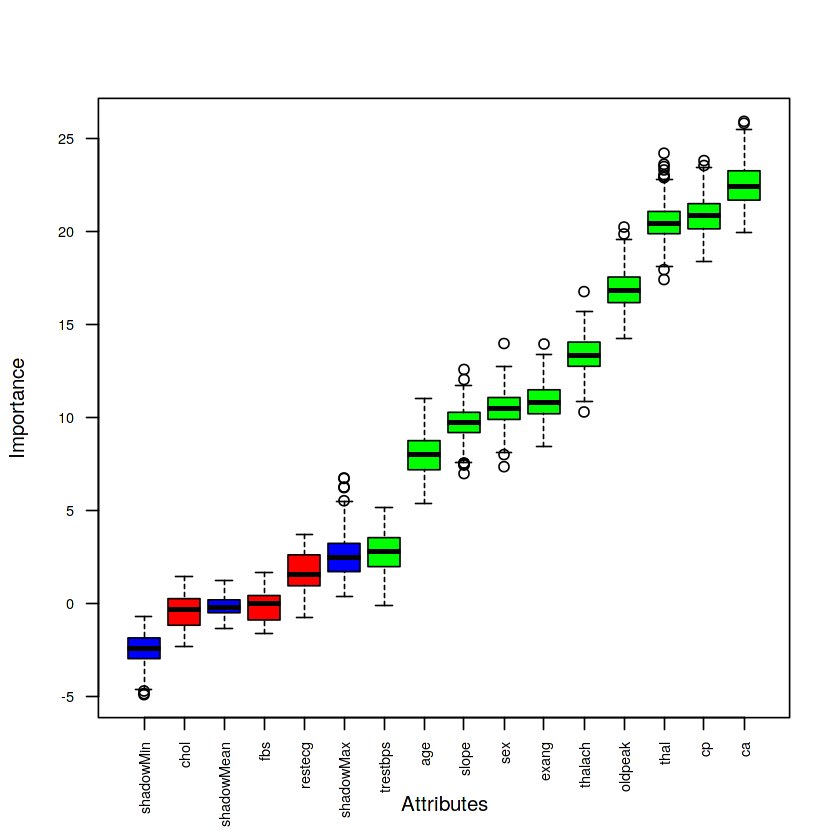

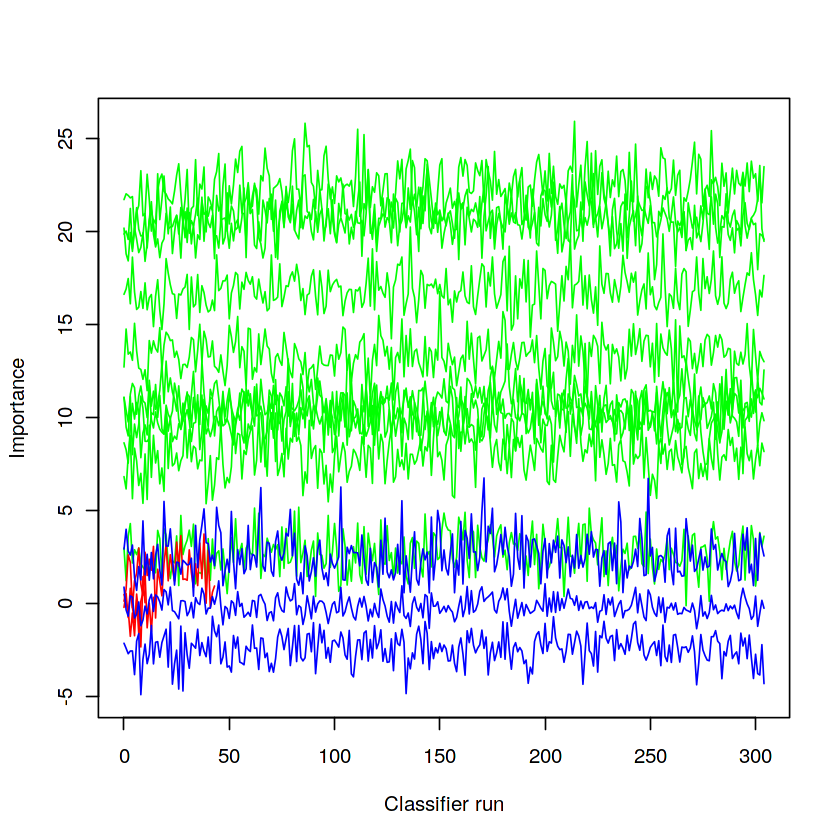

In [18]:
plot(boruta,las=2, cex.axis=0.7)
plotImpHistory(boruta)

In [19]:
#Tentative fix
bor<-TentativeRoughFix(boruta)
print(bor)
attStats(boruta)
getNonRejectedFormula(boruta)
getConfirmedFormula(boruta)

Warning message in TentativeRoughFix(boruta):
“There are no Tentative attributes! Returning original object.”

Boruta performed 305 iterations in 1.606314 mins.
 10 attributes confirmed important: age, ca, cp, exang, oldpeak and 5
more;
 3 attributes confirmed unimportant: chol, fbs, restecg;


,meanImp,medianImp,minImp,maxImp,normHits,decision
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
age,8.0163086,8.03973514,5.3787871,11.024974,1.000000000,Confirmed
sex,10.4521482,10.51151636,7.3690211,13.991474,1.000000000,Confirmed
cp,20.8097330,20.84653857,18.4080473,23.823712,1.000000000,Confirmed
trestbps,2.7757057,2.79812926,-0.1009018,5.190130,0.593442623,Confirmed
chol,-0.4228633,-0.33054355,-2.3191847,1.460109,0.000000000,Rejected
fbs,-0.1390424,0.03259389,-1.5764558,1.656815,0.003278689,Rejected
restecg,1.6779856,1.57601179,-0.7605621,3.749574,0.036065574,Rejected
thalach,13.3879400,13.36994922,10.3124760,16.781498,1.000000000,Confirmed
exang,10.8752626,10.82739932,8.4334605,13.964119,1.000000000,Confirmed


target ~ age + sex + cp + trestbps + thalach + exang + oldpeak + 
    slope + ca + thal
<environment: 0x55fb20c507f0>

target ~ age + sex + cp + trestbps + thalach + exang + oldpeak + 
    slope + ca + thal
<environment: 0x55fb208ba010>

In [20]:
# New dataframe with the relevant features
heart_FS <-subset(heart, select=c(getSelectedAttributes(boruta),"target"))

#### Dummies for categorical data

In this technique, the categorical variables **cp, slope, thal** are represented by a binary vector. The other categorical variables **sex, fbs, exang** remain the same because their categories are just 0 and 1

In [21]:
warning=FALSE #Hide warnings

result1 <- cbind(heart,dummy(heart$cp,sep="cp"))
result2 <- cbind(result1,dummy(result1$slope,sep="slope"))
heartlabel <- cbind(result2,dummy(result2$thal,sep="thal"))


#### To solve multicollinearity, the original categorical variables cp, slope, thal and the first component of the dummies' vectors are revomed
drop <-c("cp","slope","thal","NAcp0","NAslope0","NAthal1")
heartlabel <-heartlabel[,!(names(heartlabel) %in% drop)]
head(heartlabel)
dim(heartlabel)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,NAcp-1,NAcp1,NAcp3,NAcp5,NAslope-1,NAslope1,NAslope3,NAthal3,NAthal5
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,63,1,145,233,1,-1,150,-1,2.3,0,1,0,0,0,1,1,0,0,0,0
2,37,1,130,250,-1,1,187,-1,3.5,0,1,0,0,1,0,1,0,0,1,0
3,41,-1,130,204,-1,-1,172,-1,1.4,0,1,0,1,0,0,0,0,1,1,0
4,56,1,120,236,-1,1,178,-1,0.8,0,1,0,1,0,0,0,0,1,1,0
5,57,-1,120,354,-1,1,163,1,0.6,0,1,1,0,0,0,0,0,1,1,0
6,57,1,140,192,-1,1,148,-1,0.4,0,1,1,0,0,0,0,1,0,0,0


[1] 301  20

In [22]:
str(heartlabel)

'data.frame':	301 obs. of  20 variables:
 $ age      : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex      : num  1 1 -1 1 -1 1 -1 1 1 1 ...
 $ trestbps : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol     : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs      : num  1 -1 -1 -1 -1 -1 -1 -1 1 -1 ...
 $ restecg  : num  -1 1 -1 1 1 1 -1 1 1 1 ...
 $ thalach  : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang    : num  -1 -1 -1 -1 1 -1 -1 -1 -1 -1 ...
 $ oldpeak  : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ ca       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ target   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ NAcp-1   : int  0 0 0 0 1 1 0 0 0 0 ...
 $ NAcp1    : int  0 0 1 1 0 0 1 1 0 0 ...
 $ NAcp3    : int  0 1 0 0 0 0 0 0 1 1 ...
 $ NAcp5    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAslope-1: int  1 1 0 0 0 0 0 0 0 0 ...
 $ NAslope1 : int  0 0 0 0 0 1 1 0 0 0 ...
 $ NAslope3 : int  0 0 1 1 1 0 0 1 1 1 ...
 $ NAthal3  : int  0 1 1 1 1 0 1 0 0 1 ...
 $ NAthal5  : int  0 0 0 0 0 0 

#### Splitting Data

In [23]:
set.seed(123)

#Split the data 70% for training and 30% for test
ind <- sample(2,nrow(heartlabel),replace=TRUE,prob=c(0.7,0.3))
heart_train <- heartlabel[ind==1,]
heart_test <- heartlabel[ind==2,]

cat("Dimension of the train dataset (Attempt1): ", dim(heart_train)[1], "x", dim(heart_train)[2])

cat(", Dimension of the test dataset (Attempt1): ", dim(heart_test)[1], "x", dim(heart_test)[2])

#####HOLA ARA, AGREGO LA SIGUIENTE SECCIÓN EN LA MISMA CELDA PARA QUE SE EXPLIQUE SOLO UNA VEZ##### Borrar este comentario una vez se realicen 
#Split the Original data (for Attempt2 and Attempt3)
indOriginal <- sample(2,nrow(heartForLatterUse),replace=TRUE,prob=c(0.7,0.3))
heartOriginal_train <- heartForLatterUse[indOriginal==1,]
heartOriginal_test <- heartForLatterUse[indOriginal==2,]

cat("Dimension of the train dataset (Attempt2 and Attempt3): ", dim(heart_train)[1], "x", dim(heart_train)[2])

cat(", Dimension of the test dataset (Attempt2 and Attempt3): ", dim(heart_test)[1], "x", dim(heart_test)[2])

Dimension of the train dataset (Attempt1):  216 x 20

, Dimension of the test dataset (Attempt1):  85 x 20

Dimension of the train dataset (Attempt2 and Attempt3):  216 x 20

, Dimension of the test dataset (Attempt2 and Attempt3):  85 x 20

Explanation Splitting data:

-  In Attempt 1, after adding the dummies to somme categorical variables (cp, slope and thal) the dataframe was divided with a set seed in 70% for the training set (216 observations) and 30% for the testing set (85 observations).
- In attempt 2 and three, after the data exploration the dataframe was divided with a set seed in 70% for the training set (216 observations) and 30% for the testing set (85 observations).

In [24]:
str(heart_test)

'data.frame':	85 obs. of  20 variables:
 $ age      : int  37 56 57 44 54 50 69 59 61 71 ...
 $ sex      : num  1 1 -1 1 1 -1 -1 1 1 -1 ...
 $ trestbps : int  130 120 120 120 140 120 140 135 150 160 ...
 $ chol     : int  250 236 354 263 239 219 239 234 243 302 ...
 $ fbs      : num  -1 -1 -1 -1 -1 -1 -1 -1 1 -1 ...
 $ restecg  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ thalach  : int  187 178 163 173 160 158 151 161 137 162 ...
 $ exang    : num  -1 -1 1 -1 -1 -1 -1 -1 1 -1 ...
 $ oldpeak  : num  3.5 0.8 0.6 0 1.2 1.6 1.8 0.5 1 0.4 ...
 $ ca       : int  0 0 0 0 0 0 2 0 0 2 ...
 $ target   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ NAcp-1   : int  0 0 1 0 1 0 0 1 0 0 ...
 $ NAcp1    : int  0 1 0 1 0 0 0 0 0 1 ...
 $ NAcp3    : int  1 0 0 0 0 1 0 0 1 0 ...
 $ NAcp5    : int  0 0 0 0 0 0 1 0 0 0 ...
 $ NAslope-1: int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAslope1 : int  0 0 0 0 0 1 0 1 1 0 ...
 $ NAslope3 : int  0 1 1 1 1 0 1 0 0 1 ...
 $ NAthal3  : int  1 1 1 0 1 1 1 0 1 1 ...
 $ NAthal5  : int  0 0 0 1 0 0 0 1 0

#### Data normalization

Some algorithms in machine learning are more sensitive to the scale of data than others since the distance between the data points is very important.

In order to avoid this problem, a common scale (between 0 and 1) is often used which keeps the distributions of variables the same. This is often referred to as min-max scaling. The formula is shown below
$$z_{i}= \frac{x_{i}-min(x)}{max(x)-min(x)}$$

With $z_{i}$ as the new entry for each $x_{i}$ in the feature analyzed

In [25]:
#Function to normalize
#Parameters: xRef= vector/matrix of reference to normalize, xNorm= vector/matrix to normalize based on xRef
normalize <- function(xRef,xNorm) {
            return ((xNorm - min(xRef)) / (max(xRef) - min(xRef)))
            }

In [26]:
# New dataframes with features normalized
heartTrainNorm <- as.data.frame(mapply(normalize, heart_train,heart_train))

heartTestNorm <- as.data.frame(mapply(normalize, heart_train,heart_test))

#### Dimensionality reduction PCA

##### FIRST ATTEMP WITH PRE-PROCESSED VARIABLES (DUMMY+NORMALIZATION)

In [27]:
# dataframe for train without the target
heartNoTarget <- heartTrainNorm[ , -which(names(heartTrainNorm) %in% c("target"))]

In [28]:
# Find the PCA
heartTrainNormPCA <-prcomp(x = heartNoTarget, scale = FALSE, center = TRUE)

In [29]:
summary(heartTrainNormPCA)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     0.896 0.5986 0.5468 0.45721 0.39723 0.38151 0.36267
Proportion of Variance 0.312 0.1392 0.1162 0.08122 0.06131 0.05655 0.05111
Cumulative Proportion  0.312 0.4512 0.5674 0.64859 0.70990 0.76645 0.81756
                           PC8     PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.33109 0.30528 0.25973 0.2465 0.19168 0.17392 0.16079
Proportion of Variance 0.04259 0.03621 0.02621 0.0236 0.01428 0.01175 0.01005
Cumulative Proportion  0.86015 0.89637 0.92258 0.9462 0.96046 0.97221 0.98226
                          PC15    PC16    PC17      PC18      PC19
Standard deviation     0.13479 0.12461 0.10937 1.375e-16 1.044e-16
Proportion of Variance 0.00706 0.00603 0.00465 0.000e+00 0.000e+00
Cumulative Proportion  0.98932 0.99535 1.00000 1.000e+00 1.000e+00

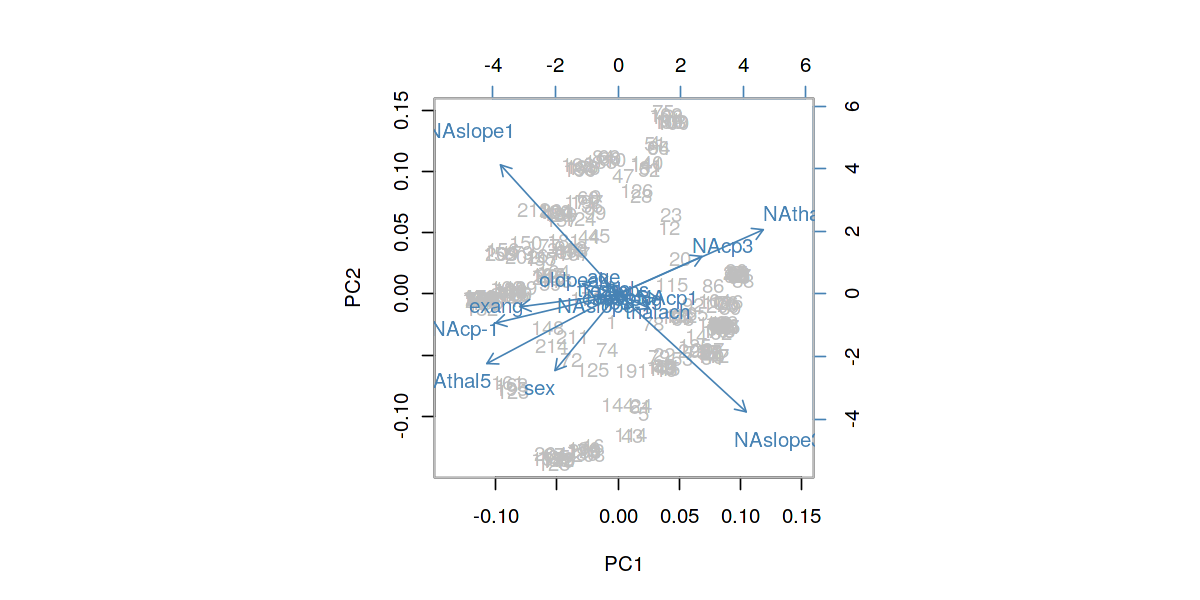

In [30]:
options(repr.plot.width=10, repr.plot.height=5)
biplot(heartTrainNormPCA, col = c("grey", "steelblue"))

It presents a more even distribution of the loading vectors (because of the scaling)

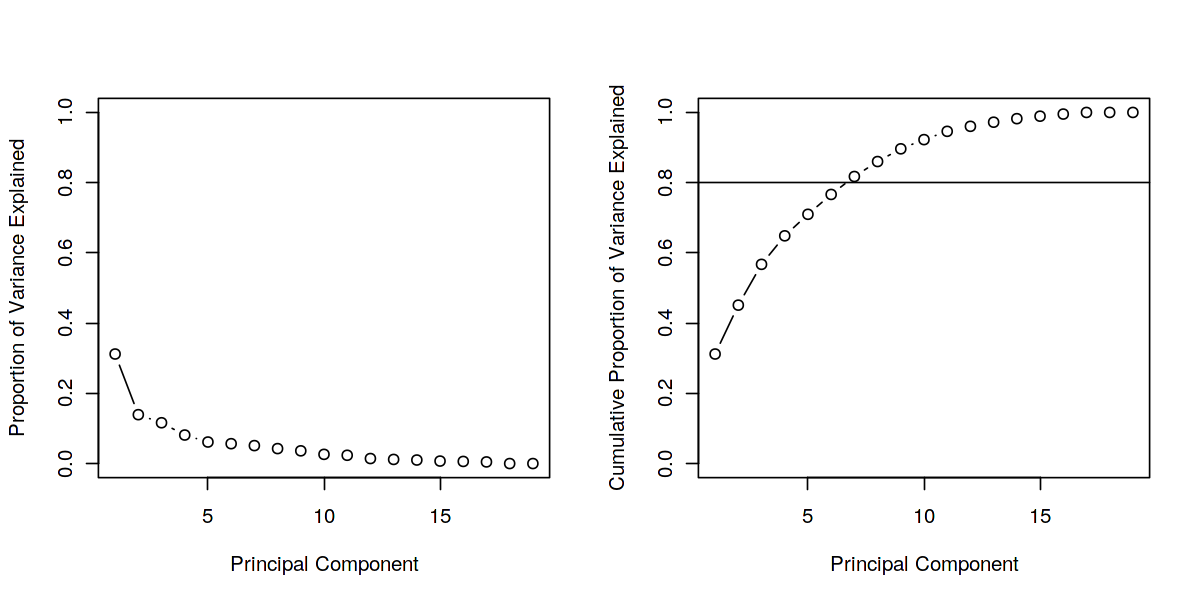

In [31]:
#Getting proportion of variance
heartTrainNormPCAvar <-heartTrainNormPCA$sdev^2
pve <- heartTrainNormPCAvar/sum(heartTrainNormPCAvar) #Proportion of variance of principal components

par(mfrow=c(1,2))
#Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", ylab ="Proportion of Variance Explained", ylim = c(0,1), type ="b")
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")
abline(h=0.8)

**Conclusion:** Select the first four components (5 is the point of inflection according to the graph on the left)

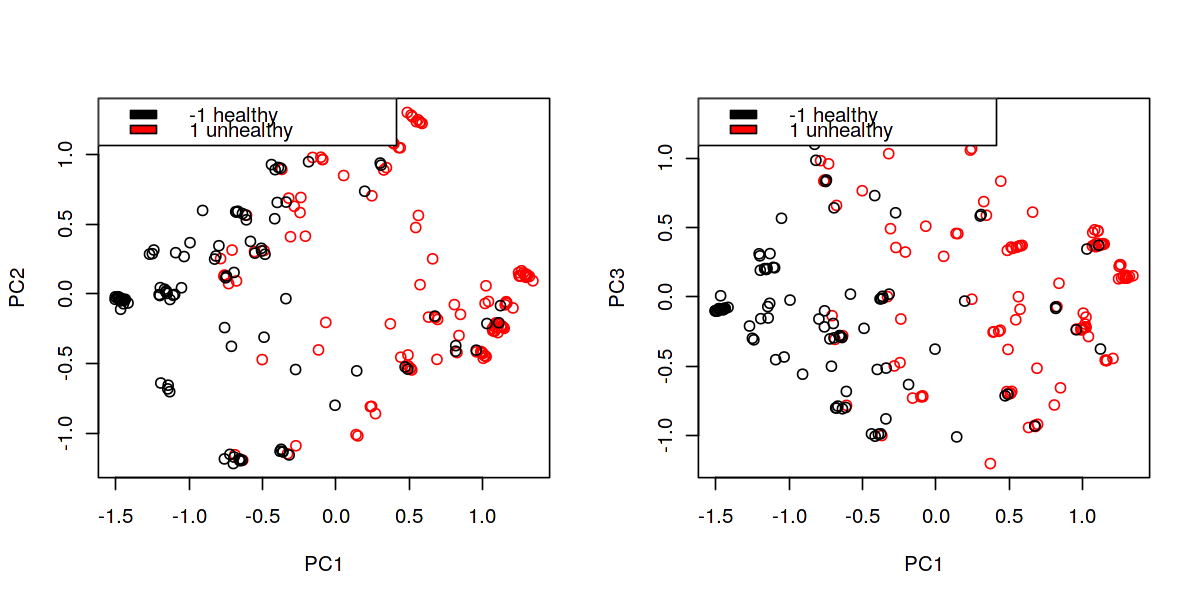

In [32]:
# Scatter plot observations by components 1 and 2
target <- as.numeric(heartTrainNorm$target == 1)
par(mfrow=c(1,2))
plot(heartTrainNormPCA$x[, c(1, 2)], col = (target + 1),
     xlab = "PC1", ylab = "PC2")
legend("topleft",
c("-1 healthy","1 unhealthy"),
fill=c("black","red")
)

# Repeat for components 1 and 3
plot(heartTrainNormPCA$x[, c(1, 3)], col = (target + 1),
     xlab = "PC1", ylab = "PC3")
legend("topleft",
c("-1 healthy","1 unhealthy"),
fill=c("black","red")
)

##### SECOND ATTEMPT WITH ORIGINAL VARIABLES

In [33]:
#PCA with original features
heartOriginalPCA <-prcomp(x = subset(heartOriginal_train,select = -target), scale = FALSE, center = TRUE)
summary(heartOriginalPCA)

Importance of components:
                          PC1     PC2      PC3     PC4     PC5    PC6     PC7
Standard deviation     49.894 22.8240 17.48554 7.55918 1.24695 1.0130 0.86279
Proportion of Variance  0.737  0.1542  0.09052 0.01692 0.00046 0.0003 0.00022
Cumulative Proportion   0.737  0.8912  0.98173 0.99865 0.99911 0.9994 0.99963
                          PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.5848 0.51892 0.45353 0.40966 0.38793 0.32394
Proportion of Variance 0.0001 0.00008 0.00006 0.00005 0.00004 0.00003
Cumulative Proportion  0.9997 0.99981 0.99987 0.99992 0.99997 1.00000

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”

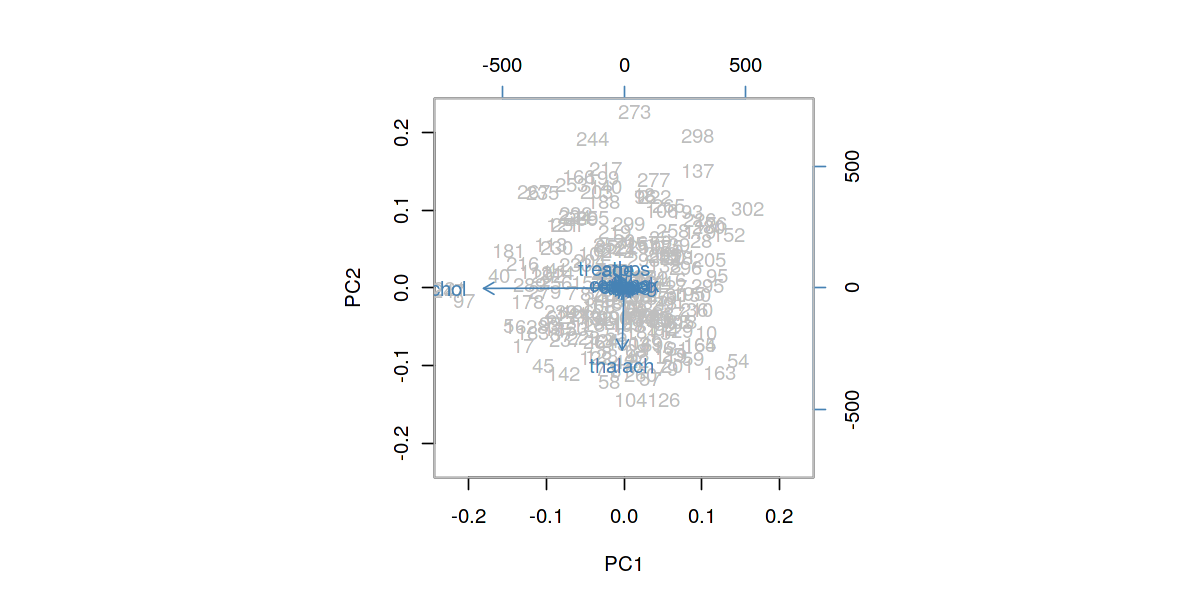

In [34]:
biplot(heartOriginalPCA, col = c("grey", "steelblue"))

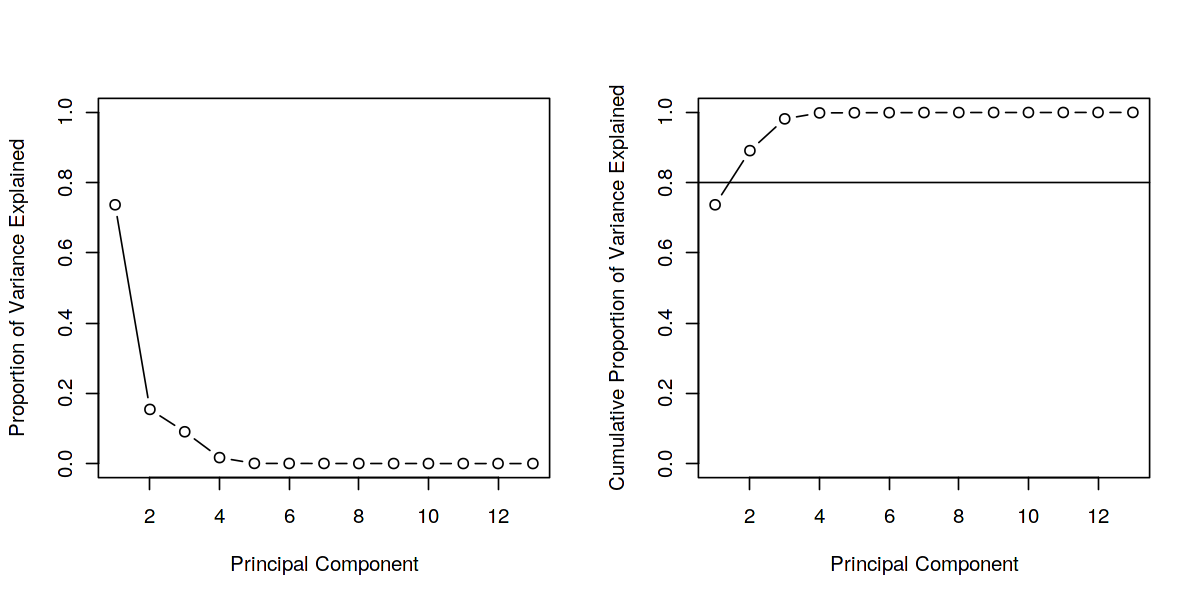

In [35]:
#Getting proportion of variance
heartOriginalPCAvar <-heartOriginalPCA$sdev^2
pve <- heartOriginalPCAvar/sum(heartOriginalPCAvar) #Proportion of variance of principal components

par(mfrow=c(1,2))
#Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", ylab ="Proportion of Variance Explained", ylim = c(0,1), type ="b")
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")
abline(h=0.8)

**Conclusion:** Select the first component

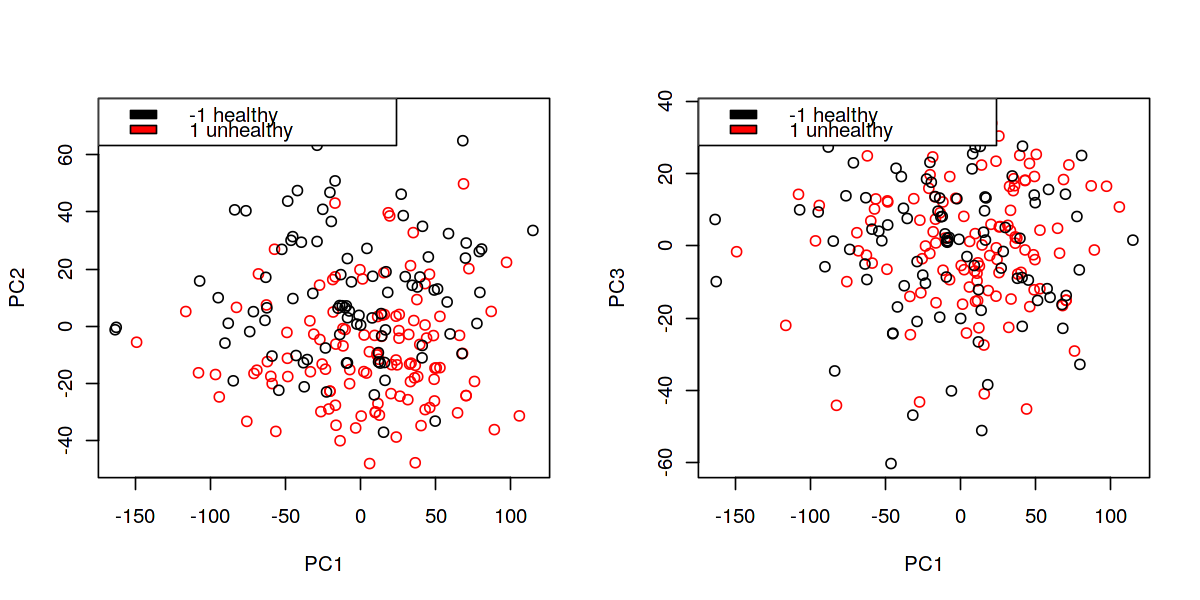

In [36]:
# Scatter plot observations by components 1 and 2
target <- as.numeric(heartOriginal_train$target == 1)
par(mfrow=c(1,2))
plot(heartOriginalPCA$x[, c(1, 2)], col = (target + 1), 
     xlab = "PC1", ylab = "PC2")
legend("topleft",
c("-1 healthy","1 unhealthy"),
fill=c("black","red")
)

# Scatter plot observations by components 1 and 3
plot(heartOriginalPCA$x[, c(1, 3)], col = (target + 1), 
     xlab = "PC1", ylab = "PC3")
legend("topleft",
c("-1 healthy","1 unhealthy"),
fill=c("black","red")
       )


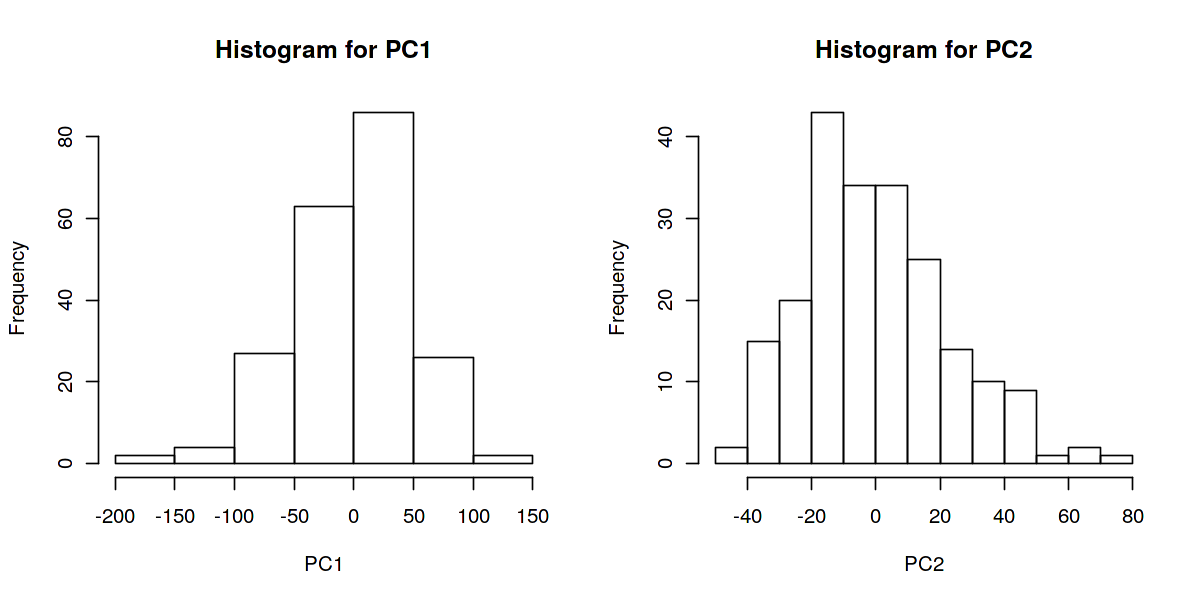

In [37]:
par(mfrow=c(1,2))
hist(heartOriginalPCA$x[, 1], main="Histogram for PC1",xlab="PC1")
hist(heartOriginalPCA$x[, 2], main="Histogram for PC2",xlab="PC2")

##### COMPARISON BETWEEN BOTH PCA ATTEMPTS

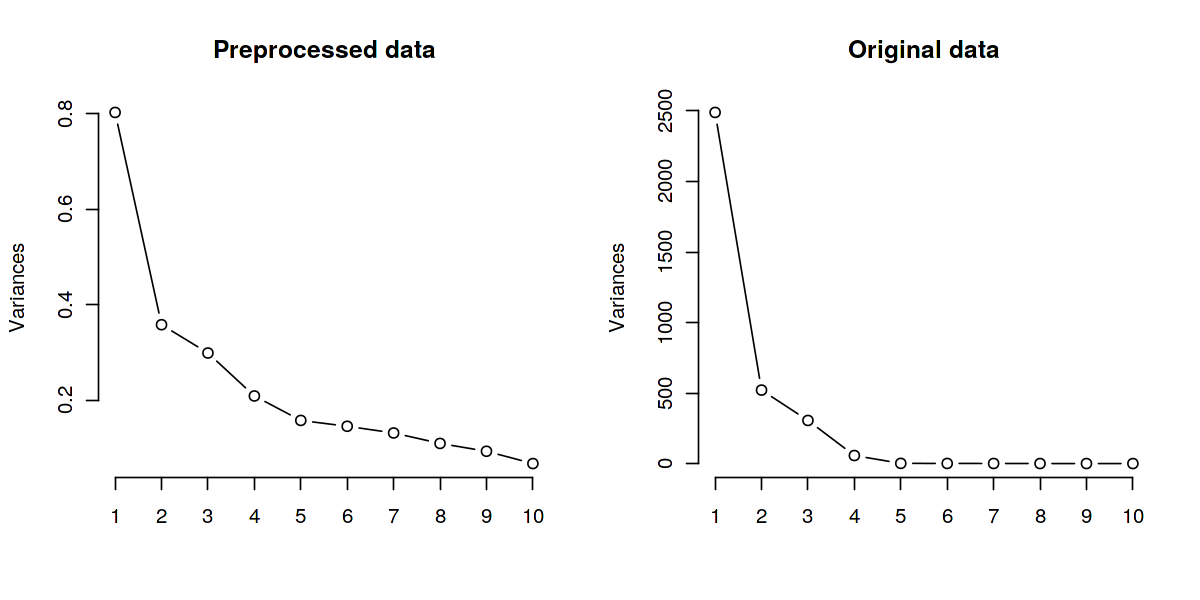

In [38]:
par(mfrow=c(1,2))
screeplot(heartTrainNormPCA, type ="lines", main="Preprocessed data")
screeplot(heartOriginalPCA, type ="lines", main="Original data")
options(repr_option_defaults)

**Conclusion:** It seems as is better to keep the original variables and select the first principal component.

In [39]:
#Create dataframes for latter use in notebook of modeling
############ Attempt1 ############
#Train
heartPCAtarget <-as.data.frame(heartTrainNormPCA$x[,c(1:4)])
heartPCAtarget$target <-heartTrainNorm$target
#Test
heartPCAtargetTest <- predict(heartTrainNormPCA, newdata = heartTestNorm)
heartPCAtargetTest <- as.data.frame(heartPCAtargetTest)[,c(1:4)]
heartPCAtargetTest$target <-heartTestNorm$target

############ Attempt2 ############
#Train
heartOriginalPCAtarget <-as.data.frame(heartOriginalPCA$x[,c(1:2)])
heartOriginalPCAtarget$target <-heartOriginal_train$target
#Test
heartOriginalPCAtargetTest <- predict(heartOriginalPCA, newdata = heartOriginal_test)
heartOriginalPCAtargetTest <- as.data.frame(heartOriginalPCAtargetTest)[,c(1:2)]
heartOriginalPCAtargetTest$target <-heartOriginal_test$target

############ Attempt3 ############
#Train
heartOriginal_train<-heartOriginal_train
#Test
heartOriginal_test<-heartOriginal_test

In [40]:
#Save the resulting dataframes in an excel file in order to use it in the notebook of modeling. Each dataframe in a separe sheet
############ Attempt1 ############
#Train
write.xlsx(heartPCAtarget, file = "heart_preprocessed.xlsx",
      sheetName = "train_A1", append = FALSE)
#Test
write.xlsx(heartPCAtargetTest, file = "heart_preprocessed.xlsx",
      sheetName = "test_A1", append = TRUE)

############ Attempt2 ############
#Train
write.xlsx(heartOriginalPCAtarget, file = "heart_preprocessed.xlsx",
      sheetName = "train_A2", append = TRUE)
#Test
write.xlsx(heartOriginalPCAtargetTest, file = "heart_preprocessed.xlsx",
      sheetName = "test_A2", append = TRUE)

############ Attempt3 ############
#Train
write.xlsx(heartOriginal_train, file = "heart_preprocessed.xlsx",
      sheetName = "train_A3", append = TRUE)
#Test
write.xlsx(heartOriginal_test, file = "heart_preprocessed.xlsx",
      sheetName = "test_A3", append = TRUE)